In [8]:
import random
import matplotlib.pyplot as plt

class AVLNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1  # New: We track height at every node

class AVLTree:
    def __init__(self):
        self.root = None

    # Helper to safely get height
    def get_height(self, node):
        if not node:
            return 0
        return node.height

    # Helper to get balance factor (Left Height - Right Height)
    def get_balance(self, node):
        if not node:
            return 0
        return self.get_height(node.left) - self.get_height(node.right)

    # ROTATION 1: Right Rotation (Fixes Left-heavy tree)
    def right_rotate(self, y):
        x = y.left
        T2 = x.right

        # Perform rotation
        x.right = y
        y.left = T2

        # Update heights (y changed, then x changed)
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))
        x.height = 1 + max(self.get_height(x.left), self.get_height(x.right))

        return x  # New root

    # ROTATION 2: Left Rotation (Fixes Right-heavy tree)
    def left_rotate(self, x):
        y = x.right
        T2 = y.left

        # Perform rotation
        y.left = x
        x.right = T2

        # Update heights
        x.height = 1 + max(self.get_height(x.left), self.get_height(x.right))
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))

        return y  # New root

    def insert(self, key):
        self.root = self._insert_recursive(self.root, key)

    def _insert_recursive(self, node, key):
        # 1. Normal BST insertion
        if not node:
            return AVLNode(key)
        
        if key < node.key:
            node.left = self._insert_recursive(node.left, key)
        elif key > node.key:
            node.right = self._insert_recursive(node.right, key)
        else:
            return node  # No duplicates

        # 2. Update height of this ancestor node
        node.height = 1 + max(self.get_height(node.left), self.get_height(node.right))

        # 3. Get the balance factor
        balance = self.get_balance(node)

        # 4. If unbalanced, then try 4 cases
        
        # Case 1: Left Left (Too heavy on the left)
        if balance > 1 and key < node.left.key:
            return self.right_rotate(node)

        # Case 2: Right Right (Too heavy on the right)
        if balance < -1 and key > node.right.key:
            return self.left_rotate(node)

        # Case 3: Left Right (Left child has a right child)
        if balance > 1 and key > node.left.key:
            node.left = self.left_rotate(node.left)
            return self.right_rotate(node)

        # Case 4: Right Left (Right child has a left child)
        if balance < -1 and key < node.right.key:
            node.right = self.right_rotate(node.right)
            return self.left_rotate(node)

        return node

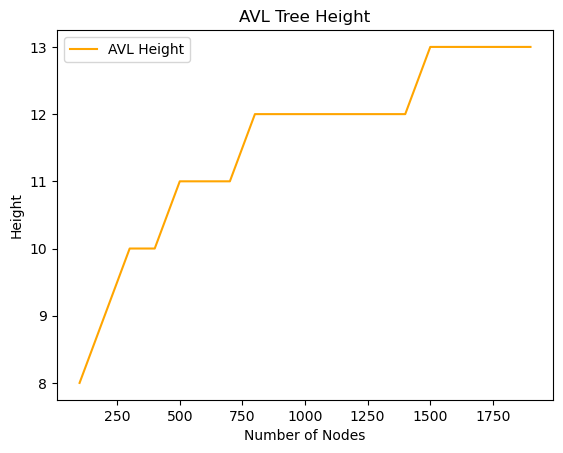

In [9]:
# --- EXPERIMENT: Compare BST vs AVL ---
def compare_bst_avl():
    sizes = range(100, 2000, 100)
    bst_heights = []
    avl_heights = []

    for n in sizes:
        # Generate random keys
        keys = random.sample(range(1, n * 10), n)
      
        # Build AVL
        my_avl = AVLTree()
        for k in keys:
            my_avl.insert(k)
        avl_heights.append(my_avl.get_height(my_avl.root))

    plt.plot(sizes, avl_heights, label="AVL Height", color='orange')
    # plt.plot(sizes, bst_heights, label="BST Height") # Uncomment to compare
    
    plt.xlabel("Number of Nodes")
    plt.ylabel("Height")
    plt.title("AVL Tree Height")
    plt.legend()
    plt.show()

compare_bst_avl()